In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#import tensorflow as tf

In [ ]:
import tensorflow as tf

In [ ]:
ORCL_data=pd.read_csv('ORCL (2).csv')

In [ ]:
ORCL_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-27,48.939999,49.220001,48.750000,48.880001,44.996006,13395600
1,2017-11-28,48.880001,49.200001,48.849998,49.009998,45.115673,13930600
2,2017-11-29,48.849998,48.860001,48.200001,48.520000,44.664604,14377600
3,2017-11-30,48.889999,49.330002,48.889999,49.060001,45.161694,24701100
4,2017-12-01,49.049999,50.000000,48.900002,49.610001,45.667992,15899500


In [ ]:
total_data=ORCL_data
total_data.rename(columns={'Adj Close':'ORCL'},inplace=True)

In [ ]:
total_data.head()

,Date,Open,High,Low,Close,ORCL,Volume
0,2017-11-27,48.939999,49.220001,48.750000,48.880001,44.996006,13395600
1,2017-11-28,48.880001,49.200001,48.849998,49.009998,45.115673,13930600
2,2017-11-29,48.849998,48.860001,48.200001,48.520000,44.664604,14377600
3,2017-11-30,48.889999,49.330002,48.889999,49.060001,45.161694,24701100
4,2017-12-01,49.049999,50.000000,48.900002,49.610001,45.667992,15899500


In [ ]:
date_time = pd.to_datetime(total_data.pop('Date'), format='%Y-%m-%d')

In [ ]:
total_data.head()

,Open,High,Low,Close,ORCL,Volume
0,48.939999,49.220001,48.750000,48.880001,44.996006,13395600
1,48.880001,49.200001,48.849998,49.009998,45.115673,13930600
2,48.849998,48.860001,48.200001,48.520000,44.664604,14377600
3,48.889999,49.330002,48.889999,49.060001,45.161694,24701100
4,49.049999,50.000000,48.900002,49.610001,45.667992,15899500


In [ ]:
total_data.index=date_time

In [ ]:
total_data.head()

,Open,High,Low,Close,ORCL,Volume
Date,,,,,,
2017-11-27,48.939999,49.220001,48.750000,48.880001,44.996006,13395600
2017-11-28,48.880001,49.200001,48.849998,49.009998,45.115673,13930600
2017-11-29,48.849998,48.860001,48.200001,48.520000,44.664604,14377600
2017-11-30,48.889999,49.330002,48.889999,49.060001,45.161694,24701100
2017-12-01,49.049999,50.000000,48.900002,49.610001,45.667992,15899500


In [ ]:
total_data=total_data.drop(['Open','High','Low','Close','Volume'],axis=1)

In [ ]:
total_data.head()

,ORCL
Date,
2017-11-27,44.996006
2017-11-28,45.115673
2017-11-29,44.664604
2017-11-30,45.161694
2017-12-01,45.667992


In [ ]:
total_data=total_data.dropna()

In [ ]:
len(total_data)

1259

In [ ]:
n=len(total_data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df_scaled=scaler.fit_transform(total_data.to_numpy())

In [ ]:
df_scaled

array([[0.1090961 ],
       [0.11097022],
       [0.10390596],
       ...,
       [0.69050054],
       [0.69739137],
       [0.6998972 ]])

In [ ]:
list(total_data.columns)

['ORCL']

In [ ]:
df_scaled=pd.DataFrame(df_scaled,columns=list(total_data.columns))

In [ ]:
df_scaled.head()

,ORCL
0,0.109096
1,0.110970
2,0.103906
3,0.111691
4,0.119620


In [ ]:
df_scaled.index=date_time

In [ ]:
df_scaled.head()

,ORCL
Date,
2017-11-27,0.109096
2017-11-28,0.110970
2017-11-29,0.103906
2017-11-30,0.111691
2017-12-01,0.119620


In [ ]:
total_data=df_scaled

In [ ]:
total_data.head()

,ORCL
Date,
2017-11-27,0.109096
2017-11-28,0.110970
2017-11-29,0.103906
2017-11-30,0.111691
2017-12-01,0.119620


In [ ]:
total_data=total_data[['ORCL']]

In [ ]:
total_data.head()

,ORCL
Date,
2017-11-27,0.109096
2017-11-28,0.110970
2017-11-29,0.103906
2017-11-30,0.111691
2017-12-01,0.119620


In [ ]:
train_df=total_data[:int(n*0.7)]
val_df=total_data[int(n*0.7):int(n*0.9)]
test_df=total_data[int(n*0.9):]

num_features=total_data.shape[1]

In [ ]:
len(train_df)

881

In [ ]:
num_features

1

In [ ]:
class WindowGenerator():
  def __init__(self,input_width, label_width, shift,
               train_df=train_df,val_df=val_df,test_df=test_df,
               label_columns=None):
     #Store the raw data
     self.train_df=train_df
     self.val_df=val_df
     self.test_df=test_df

     #work out the label column indices
     self.label_columns=label_columns
     if label_columns is not None:
       self.label_columns_indices={name:i for i,name in enumerate(label_columns)}
     self.column_indices={name:i for i,name in enumerate(train_df.columns)}

     #Work out the window parameters
     self.input_width=input_width
     self.label_width=label_width
     self.shift=shift

     self.total_window_size=input_width+shift

     self.input_slice=slice(0,input_width)
     self.input_indices=np.arange(self.total_window_size)[self.input_slice]

     self.label_start=self.total_window_size-self.label_width
     self.labels_slice=slice(self.label_start,None)
     self.label_indices=np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size:{self.total_window_size}',
        f'Input indices:{self.input_indices}',
        f'Label indices:{self.label_indices}',
        f'Label column name(s):{self.label_columns}'
    ]) 

In [ ]:
def split_window(self,features):
  inputs=features[:,self.input_slice,:]
  labels=features[:,self.labels_slice,:]
  if self.label_columns is not None:
    labels=tf.stack(
        [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                    axis=-1)
    
  #slicing doesn't preserve statics shape information, so set the shapes
  #munually. This way the 'tf.datasets' are eaiser to inspect
  inputs.set_shape([None,self.input_width,None])
  labels.set_shape([None,self.label_width,None])

  return inputs,labels

WindowGenerator.split_window=split_window  

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=8):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience)


  model.compile(loss=tf.keras.losses.MeanSquaredError(),
         # loss='mae',      
                optimizer=tf.keras.optimizers.Adam(),
                #optimizer=tf.keras.optimizers.RMSprop(0.0001),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
OUT_STEPS=60

In [ ]:
wide_window=WindowGenerator(input_width=90,label_width=OUT_STEPS,shift=OUT_STEPS)

In [ ]:
wide_window

Total window size:150
Input indices:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Label indices:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
Label column name(s):None

In [ ]:
multi_lstm=tf.keras.Sequential([ 
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32,return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS,num_features])
])

In [ ]:
history=compile_and_fit(multi_lstm,wide_window)

Epoch 1/50
23/23 [==============================] - 14s 302ms/step - loss: 0.0291 - mean_absolute_error: 0.1358 - val_loss: 0.1929 - val_mean_absolute_error: 0.3988
Epoch 2/50
23/23 [==============================] - 6s 240ms/step - loss: 0.0063 - mean_absolute_error: 0.0579 - val_loss: 0.0763 - val_mean_absolute_error: 0.2280
Epoch 3/50
23/23 [==============================] - 6s 241ms/step - loss: 0.0036 - mean_absolute_error: 0.0452 - val_loss: 0.0506 - val_mean_absolute_error: 0.1783
Epoch 4/50
23/23 [==============================] - 6s 240ms/step - loss: 0.0032 - mean_absolute_error: 0.0426 - val_loss: 0.0455 - val_mean_absolute_error: 0.1684
Epoch 5/50
23/23 [==============================] - 7s 296ms/step - loss: 0.0029 - mean_absolute_error: 0.0410 - val_loss: 0.0457 - val_mean_absolute_error: 0.1690
Epoch 6/50
23/23 [==============================] - 6s 244ms/step - loss: 0.0027 - mean_absolute_error: 0.0400 - val_loss: 0.0480 - val_mean_absolute_error: 0.1737
Epoch 7/50
23/2

In [ ]:
last_90_data=total_data[-90:].to_numpy()
tensor_data=tf.convert_to_tensor(last_90_data[np.newaxis])

In [ ]:
predicted_next_60=multi_lstm(tensor_data)[0].numpy()

In [ ]:
min_value=min(ORCL_data['ORCL'])

In [ ]:
max_value=max(ORCL_data['ORCL'])

In [ ]:
tranform_back=(max_value-min_value)*predicted_next_60[:,0]+min_value

In [ ]:
predicted_next_60_list=list(tranform_back)

In [ ]:
ORCL_data.head()

,Open,High,Low,Close,ORCL,Volume
Date,,,,,,
2017-11-27,48.939999,49.220001,48.750000,48.880001,44.996006,13395600
2017-11-28,48.880001,49.200001,48.849998,49.009998,45.115673,13930600
2017-11-29,48.849998,48.860001,48.200001,48.520000,44.664604,14377600
2017-11-30,48.889999,49.330002,48.889999,49.060001,45.161694,24701100
2017-12-01,49.049999,50.000000,48.900002,49.610001,45.667992,15899500


In [ ]:
predicted_next_60_list.insert(0,ORCL_data['ORCL'][-1])

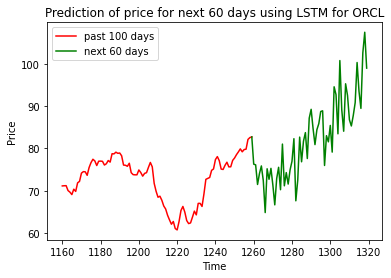

In [ ]:
plt.plot(range(1160,1260),ORCL_data['ORCL'][-100:],color='r',label='past 100 days')
plt.plot(range(1259,1320),predicted_next_60_list,color='g',label='next 60 days')

plt.ylabel('Price')
plt.xlabel('Time')
plt.title('Prediction of price for next 60 days using LSTM for ORCL')
plt.legend()
plt.show()